# Mental Health Models

In [1]:
# Importing tools for data cleaning and analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Dataframes of Selected Features

In [2]:
demographic = pd.read_csv('./demographic_df.csv')
body_df = pd.read_csv('./body_measurements.csv')
blood_pressure_measurements = pd.read_csv('./blood_pressure_measurements.csv')
albumin_and_creatinine_measurements = pd.read_csv('./albumin_and_creatinine_measurements.csv')
cholesterol_measurements = pd.read_csv('./cholesterol_measurements.csv')
glycohemoglobin_measurements = pd.read_csv('./glycohemoglobin_measurements.csv')
hepatitis_A_measurements = pd.read_csv('./hepatitis_A_measurements.csv')
biochemistry_measurements = pd.read_csv('./biochemistry_measurements.csv')
mental = pd.read_csv('./mental_health.csv')

#### Demographic Only

In [3]:
demographic_data = mental.merge(demographic, on = 'SEQN', how = 'inner')
demographic_data = demographic_data.drop('SEQN', axis = 1)

In [4]:
demographic_data.isnull().sum()/len(demographic_data)

Have little interest in doing things     0.000000
Feeling down, depressed, or hopeless     0.000000
Trouble sleeping or sleeping too much    0.000000
Feeling tired or having little energy    0.000000
Poor appetite or overeating              0.000000
Feeling bad about yourself               0.000000
Trouble concentrating on things          0.000000
Moving or speaking slowly or too fast    0.000000
Thought you would be better off dead     0.000000
gender                                   0.000000
age                                      0.000000
ethnicity                                0.000000
veteran_status                           0.000000
country_of_birth                         0.000000
citizenship_status                       0.001948
education                                0.000000
marital_status                           0.000000
household_under5                         0.000000
household_6to17                          0.000000
household_over60                         0.000000


In [5]:
'''Household income has almost 10% missing data, ran models with this feature and 
got around ~58% accuracy but I feel Im losing too much data for this feature. I will drop out for now.'''

demographic_data = demographic_data.drop('household_income', axis = 1)

In [6]:
demographic_data.isnull().sum()/len(demographic_data)

Have little interest in doing things     0.000000
Feeling down, depressed, or hopeless     0.000000
Trouble sleeping or sleeping too much    0.000000
Feeling tired or having little energy    0.000000
Poor appetite or overeating              0.000000
Feeling bad about yourself               0.000000
Trouble concentrating on things          0.000000
Moving or speaking slowly or too fast    0.000000
Thought you would be better off dead     0.000000
gender                                   0.000000
age                                      0.000000
ethnicity                                0.000000
veteran_status                           0.000000
country_of_birth                         0.000000
citizenship_status                       0.001948
education                                0.000000
marital_status                           0.000000
household_under5                         0.000000
household_6to17                          0.000000
household_over60                         0.000000


#### Combination of all health based Dataframes

In [7]:
data_health = body_df.merge(blood_pressure_measurements, on = 'SEQN', how = 'inner')

data_health = data_health.merge(albumin_and_creatinine_measurements, on = 'SEQN', how = 'inner')

data_health = data_health.merge(cholesterol_measurements, on = 'SEQN', how = 'inner')

data_health = data_health.merge(glycohemoglobin_measurements, on = 'SEQN', how = 'inner')

data_health = data_health.merge(hepatitis_A_measurements, on = 'SEQN', how = 'inner')

data_health = data_health.merge(biochemistry_measurements, on = 'SEQN', how = 'inner')

data_health = data_health.merge(mental, on = 'SEQN', how = 'inner')

In [8]:
data_health.isnull().sum()/len(data_health)

SEQN                                     0.000000
weight_kg                                0.009349
standing_height                          0.008181
waist_circumference                      0.040125
arm_circumference                        0.030580
60_sec_pulse                             0.012855
systolic                                 0.045384
diastolic                                0.045384
Albumin(ug/mL)                           0.015777
creatinine(mg/dL)                        0.015777
total_cholesterol(mg/dL)                 0.051617
glycohemoglobin                          0.043825
hepatitis_A                              0.077328
calcium(mg/dL)                           0.052980
iron(ug/dL)                              0.053759
potassium(mmol/L)                        0.052980
sodium(mmol/L)                           0.052980
phosphorus(mg/dL)                        0.053175
total_protein(g/dL)                      0.053759
triglycerides(mg/dL)                     0.053564


#### Dropping nan's

In [9]:
demographic_data.dropna(inplace = True)

In [10]:
data_health.dropna(inplace = True)

## Demographic Models
----

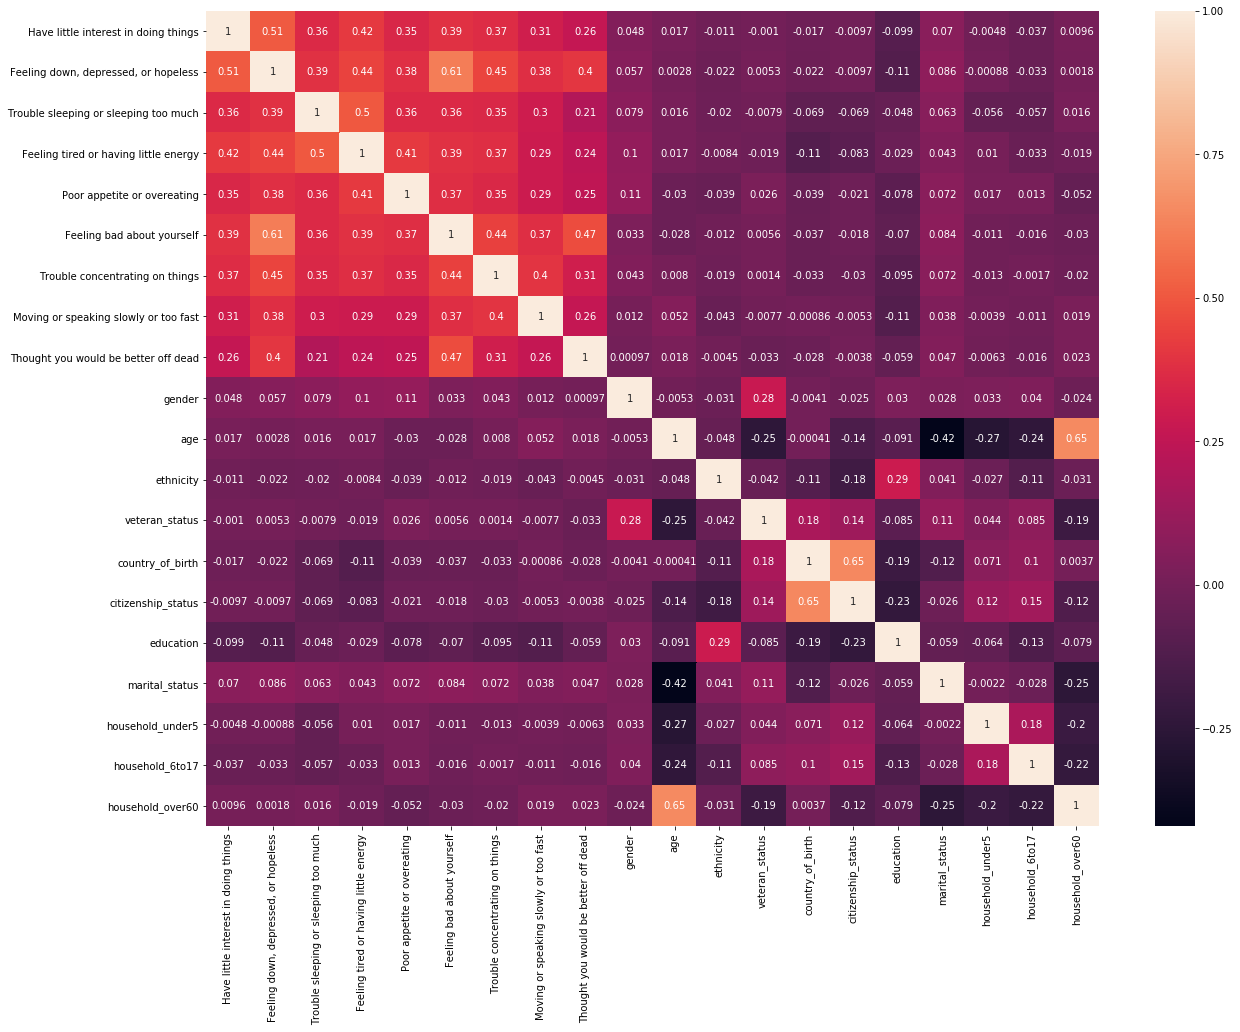

In [11]:
fig, ax = plt.subplots(figsize = (20,15))

sns.heatmap(demographic_data.corr(), annot = True)

### Dummying the Categorical Variables

##### Ethnicity

In [12]:
ethnicity_dummies = pd.get_dummies(demographic_data['ethnicity'])

ethnicity_dummies.columns = ['1 - Mexican American', '2 - Other Hispanic', '3 - Non-Hispanic White',
                     '4 - Non-Hispanic Black', '5 - Non-Hispanic Asian', '6 - Other Race - Including Multi-Racial']

ethnicity_dummies = ethnicity_dummies.drop('6 - Other Race - Including Multi-Racial', axis = 1)

demographic_data = pd.concat([demographic_data, ethnicity_dummies], axis = 1)
demographic_data = demographic_data.drop('ethnicity', axis = 1)

##### Education

In [13]:
education_dummies = pd.get_dummies(demographic_data['education'])

education_dummies.columns = ['1 - Less than 9th grade', '2 - 9-11th grade (Includes 12th grade with no diploma)',
                     '3 - High school graduate/GED or equivalent', '4 - Some college or AA degree',
                     '5 - College graduate or above']

education_dummies = education_dummies.drop('2 - 9-11th grade (Includes 12th grade with no diploma)', axis = 1)

demographic_data = pd.concat([demographic_data, education_dummies], axis = 1)
demographic_data = demographic_data.drop('education', axis = 1)

##### Maritial Status

In [14]:
marital_dummies = pd.get_dummies(demographic_data['marital_status'])

marital_dummies.columns = ['1 - Married', '2 - Widowed', '3 - Divorced', '4 - Separated',
                     '5 - Never married', '6 - Living with partner']

marital_dummies = marital_dummies.drop('4 - Separated', axis = 1)

demographic_data = pd.concat([demographic_data, marital_dummies], axis = 1)
demographic_data = demographic_data.drop('marital_status', axis = 1)

##### Household under 5

In [15]:
under5_dummies = pd.get_dummies(demographic_data['household_under5'])

under5_dummies.columns = ['0 - 0 Number of children under 5', '1 - 1 Number of children under 5',
                     '2 - 2 Number of children under 5', '3 - 3 or more Number of children under 5']

under5_dummies = under5_dummies.drop('3 - 3 or more Number of children under 5', axis = 1)

demographic_data = pd.concat([demographic_data, under5_dummies], axis = 1)
demographic_data = demographic_data.drop('household_under5', axis = 1)

##### Household 6 to 17

In [16]:
age6to17_dummies = pd.get_dummies(demographic_data['household_6to17'])

age6to17_dummies.columns = ['0 - 0 Number of children 6 - 17', '1 - 1 Number of children 6 - 17',
                            '2 - 2 Number of children 6 - 17', '3 - 3 Number of children 6 - 17',
                            '4 - 4 or more Number of children 6 - 17']

age6to17_dummies = age6to17_dummies.drop('4 - 4 or more Number of children 6 - 17', axis = 1)

demographic_data = pd.concat([demographic_data, age6to17_dummies], axis = 1)
demographic_data = demographic_data.drop('household_6to17', axis = 1)

##### Household over 60

In [17]:
over60_dummies = pd.get_dummies(demographic_data['household_over60'])

over60_dummies.columns = ['0 - 0 Number of adults', '1 - 1 Number of adults', 
                     '2 - 2 Number of adults', '3 - 3 or more Number of adult']

over60_dummies = over60_dummies.drop('3 - 3 or more Number of adult', axis = 1)

demographic_data = pd.concat([demographic_data, over60_dummies], axis = 1)
demographic_data = demographic_data.drop('household_over60', axis = 1)

### Train Test Split

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler

#### Slice data into X's and y's

In [19]:
X = demographic_data.iloc[:, 9:]
y = demographic_data.iloc[:,:9]

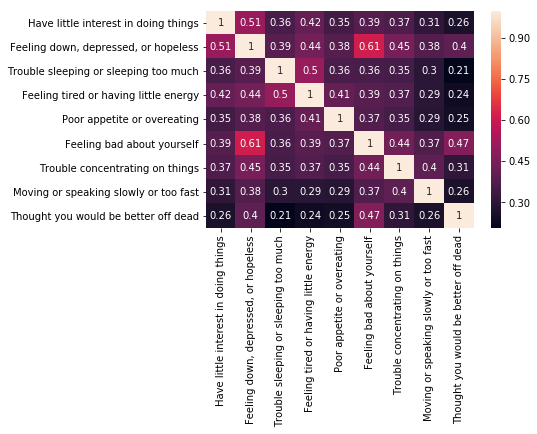

In [20]:
sns.heatmap(y.corr(), annot = True)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

#### Predictions

To improve model accuracy, I consolidated the categorial variables to a binary, yes or no target.

In [22]:
# Baseline = 0.7387
# Baseline = 0.7595
# Baseline = 0.6185
# Baseline = 0.4774
# Baseline = 0.7386
# Baseline = 0.8372
# Baseline = 0.8377
# Baseline = 0.8941
# Baseline = 0.9625

In [23]:
y_train_1 = y_train['Have little interest in doing things'].apply(lambda x: 1 if x > 0 else x).values # Baseline = 0.7387
y_train_2 = y_train['Feeling down, depressed, or hopeless'].apply(lambda x: 1 if x > 0 else x).values # Baseline = 0.7595
y_train_3 = y_train['Trouble sleeping or sleeping too much'].apply(lambda x: 1 if x > 0 else x).values # Baseline = 0.6185
y_train_4 = y_train['Feeling tired or having little energy'].apply(lambda x: 1 if x > 0 else x).values # Baseline = 0.4774
y_train_5 = y_train['Poor appetite or overeating'].apply(lambda x: 1 if x > 0 else x).values # Baseline = 0.7386
y_train_6 = y_train['Feeling bad about yourself'].apply(lambda x: 1 if x > 0 else x).values # Baseline = 0.8372
y_train_7 = y_train['Trouble concentrating on things'].apply(lambda x: 1 if x > 0 else x).values # Baseline = 0.8377
y_train_8 = y_train['Moving or speaking slowly or too fast'].apply(lambda x: 1 if x > 0 else x).values # Baseline = 0.8941
y_train_9 = y_train['Thought you would be better off dead'].apply(lambda x: 1 if x > 0 else x).values # Baseline = 0.9625

y_test_1 = y_test['Have little interest in doing things'].apply(lambda x: 1 if x > 0 else x).values
y_test_2 = y_test['Feeling down, depressed, or hopeless'].apply(lambda x: 1 if x > 0 else x).values
y_test_3 = y_test['Trouble sleeping or sleeping too much'].apply(lambda x: 1 if x > 0 else x).values
y_test_4 = y_test['Feeling tired or having little energy'].apply(lambda x: 1 if x > 0 else x).values
y_test_5 = y_test['Poor appetite or overeating'].apply(lambda x: 1 if x > 0 else x).values
y_test_6 = y_test['Feeling bad about yourself'].apply(lambda x: 1 if x > 0 else x).values
y_test_7 = y_test['Trouble concentrating on things'].apply(lambda x: 1 if x > 0 else x).values
y_test_8 = y_test['Moving or speaking slowly or too fast'].apply(lambda x: 1 if x > 0 else x).values
y_test_9 = y_test['Thought you would be better off dead'].apply(lambda x: 1 if x > 0 else x).values

In [24]:
import pprint
pp = pprint.PrettyPrinter()


In [25]:
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

/Users/jack/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [26]:
cv = StratifiedKFold(n_splits = 5, random_state = 42)

In [27]:
lr = LogisticRegression()

#### Standardized my train and test X's

In [28]:
ss = StandardScaler()

Xs = ss.fit_transform(X_train)
Xs_test = ss.transform(X_test)

## Grid Search with Logistic Regression over all Training Data using only demograhic_data

In [29]:
def gridSearcher(X, y):
    tuned_parameters = {'C': np.logspace(-10,10,50)}
    clf = GridSearchCV(estimator = LogisticRegression(penalty = 'l2'), 
                       param_grid = tuned_parameters, scoring = 'accuracy')
    clf.fit(X, y)
    
    print clf.best_estimator_
    print ('----')
    print 'clf best parameter {}'.format(clf.best_params_)
    print ('----')
    print 'clf best index {}'.format(clf.best_index_)
    print ('----')
    print 'clf best best score {}'.format(clf.best_score_)

### Function to predit on Test and get Model Coefs

In [30]:
def logisticCoefs(Cs, X_t, y_t, X_test, y_test):
    lr_model = LogisticRegression(C = Cs).fit(X_t, y_t)
    
    for element in lr_model.coef_.tolist():
        lr_model_coefs = [[x, y] for x, y in zip(X_train, element)]
        
    lr_model_coefs.sort(key = lambda x: x[1])
    
    print 'Test model score is {}'.format(lr_model.score(X_test, y_test))
    print ('----')
    print ('Model Coefficents are:')
    pp.pprint(lr_model_coefs)
    

#### 'Have little interest in doing things'
Baseline = 0.7387

In [31]:
gridSearcher(Xs, y_train_1)

LogisticRegression(C=0.00033932217718953299, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
----
clf best parameter {'C': 0.00033932217718953299}
----
clf best index 16
----
clf best best score 0.738668401648


#### Logistic Regression score on test data

In [32]:
logisticCoefs(0.00033932217718953299, Xs, y_train_1, Xs_test, y_test_1)

Test model score is 0.746588693957
----
Model Coefficents are:
[['1 - Married', -0.03815044020060548],
 ['5 - College graduate or above', -0.03536043599210552],
 ['5 - Non-Hispanic Asian', -0.014194272432913897],
 ['2 - 2 Number of children 6 - 17', -0.013103316180699426],
 ['3 - 3 Number of children 6 - 17', -0.012179509183812397],
 ['country_of_birth', -0.010724635674960141],
 ['3 - Non-Hispanic White', -0.008333775199068411],
 ['1 - 1 Number of children under 5', -0.007049634429100974],
 ['age', -0.004878296947147582],
 ['0 - 0 Number of adults', -0.003831942150693862],
 ['veteran_status', -0.0011331344741445193],
 ['6 - Living with partner', -0.0006826661457901565],
 ['1 - Mexican American', -0.0004922724665167911],
 ['3 - High school graduate/GED or equivalent', -0.00010277439163613328],
 ['2 - Widowed', 0.0020581972056388513],
 ['4 - Some college or AA degree', 0.002175183579132641],
 ['2 - 2 Number of adults', 0.0023368514631138273],
 ['0 - 0 Number of children under 5', 0.00321

#### 'Feeling down, depressed, or hopeless'
Baseline = 0.7595

In [33]:
gridSearcher(Xs, y_train_2)

LogisticRegression(C=0.0022229964825261957, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
----
clf best parameter {'C': 0.0022229964825261957}
----
clf best index 18
----
clf best best score 0.757319453481


#### Logistic Regression score on test data

In [34]:
logisticCoefs(0.0022229964825261957, Xs, y_train_2, Xs_test, y_test_2)

Test model score is 0.789473684211
----
Model Coefficents are:
[['5 - College graduate or above', -0.09605358257340481],
 ['1 - Married', -0.09379472228302417],
 ['4 - Non-Hispanic Black', -0.05661083393492461],
 ['1 - Mexican American', -0.0469469298569806],
 ['5 - Non-Hispanic Asian', -0.042437282744965096],
 ['country_of_birth', -0.038596785638399946],
 ['2 - 2 Number of children under 5', -0.029788965466201498],
 ['2 - 2 Number of children 6 - 17', -0.029430384239722034],
 ['4 - Some college or AA degree', -0.026763632673592122],
 ['1 - 1 Number of adults', -0.021335501443819405],
 ['3 - High school graduate/GED or equivalent', -0.014369412797725379],
 ['age', -0.013461227847597004],
 ['6 - Living with partner', -0.011143200587213554],
 ['0 - 0 Number of children under 5', -0.009831491045318021],
 ['2 - 2 Number of adults', -0.005601651083192964],
 ['3 - 3 Number of children 6 - 17', -0.002413217094727086],
 ['1 - 1 Number of children 6 - 17', 0.00011775591692904086],
 ['veteran_st

#### 'Trouble sleeping or sleeping too much'
Baseline = 0.6185

In [35]:
gridSearcher(Xs, y_train_3)

LogisticRegression(C=0.037275937203149381, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
----
clf best parameter {'C': 0.037275937203149381}
----
clf best index 21
----
clf best best score 0.624810236391


#### Logistic Regression score on test data

In [36]:
logisticCoefs(0.037275937203149381, Xs, y_train_3, Xs_test, y_test_3)

Test model score is 0.621832358674
----
Model Coefficents are:
[['1 - Married', -0.19887307876534732],
 ['age', -0.16742223473478657],
 ['5 - College graduate or above', -0.1374730589636505],
 ['6 - Living with partner', -0.1200805329124631],
 ['3 - High school graduate/GED or equivalent', -0.0961625017218999],
 ['4 - Some college or AA degree', -0.08819436868462315],
 ['4 - Non-Hispanic Black', -0.07014411787189592],
 ['5 - Never married', -0.06786117999744565],
 ['citizenship_status', -0.06454883601238748],
 ['5 - Non-Hispanic Asian', -0.0436706068189512],
 ['veteran_status', -0.040608302275851646],
 ['country_of_birth', -0.032381080703547546],
 ['2 - Widowed', -0.0317944060897625],
 ['1 - Less than 9th grade', -0.02946380782958248],
 ['1 - Mexican American', -0.01934187071088275],
 ['2 - 2 Number of children under 5', -0.012699482663615945],
 ['1 - 1 Number of adults', 0.005221312058460707],
 ['3 - Divorced', 0.010923762427374738],
 ['0 - 0 Number of adults', 0.011337840908738198],


### Feeling tired or having little energy Column
Baseline = 0.5222

In [37]:
gridSearcher(Xs, y_train_4)

LogisticRegression(C=0.0056898660290183051, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
----
clf best parameter {'C': 0.0056898660290183051}
----
clf best index 19
----
clf best best score 0.576230752548


#### Logistic Regression score on test data

In [38]:
logisticCoefs(.0056898660290183051, Xs, y_train_4, Xs_test, y_test_4)

Test model score is 0.561403508772
----
Model Coefficents are:
[['country_of_birth', -0.09347171613315791],
 ['1 - Married', -0.08726942307935819],
 ['4 - Non-Hispanic Black', -0.08173908142836386],
 ['citizenship_status', -0.05003797244837261],
 ['5 - Non-Hispanic Asian', -0.048780085798461416],
 ['age', -0.04691580851787761],
 ['2 - Widowed', -0.04258155060699947],
 ['0 - 0 Number of children under 5', -0.03183929756998673],
 ['veteran_status', -0.03161526035725354],
 ['5 - Never married', -0.030956926550518876],
 ['1 - Mexican American', -0.02720298059410684],
 ['5 - College graduate or above', -0.02651026363084672],
 ['2 - 2 Number of adults', -0.024311752329682156],
 ['1 - 1 Number of children under 5', -0.01923195002959636],
 ['1 - 1 Number of adults', -0.01785049357754046],
 ['1 - Less than 9th grade', -0.010922230650067106],
 ['6 - Living with partner', -0.007629833097054098],
 ['2 - 2 Number of children under 5', -0.004861816896175154],
 ['3 - High school graduate/GED or equiv

In [39]:
lr = LogisticRegression(C = .0056898660290183051)

In [40]:
lr = LogisticRegression(C = .0056898660290183051)
lr_model = lr.fit(Xs, y_train_4)

In [41]:
lr_model.coef_

array([[ 0.17573658, -0.04691581, -0.03161526, -0.09347172, -0.05003797,
        -0.02720298,  0.01556836,  0.05195068, -0.08173908, -0.04878009,
        -0.01092223,  0.00386068,  0.04310895, -0.02651026, -0.08726942,
        -0.04258155,  0.03289706, -0.03095693, -0.00762983, -0.0318393 ,
        -0.01923195, -0.00486182,  0.06621247,  0.03723713,  0.03277806,
         0.04285884,  0.04899116, -0.01785049, -0.02431175]])

In [42]:
for x in lr_model.coef_.tolist():
    tired_1 = []
    for a, b in zip(X_train, x):
         tired_1.append([a, b])
tired_1.sort(key = lambda x: x[1])

In [43]:
tired_1

[['country_of_birth', -0.09347171613315794],
 ['1 - Married', -0.08726942307935821],
 ['4 - Non-Hispanic Black', -0.08173908142836388],
 ['citizenship_status', -0.05003797244837257],
 ['5 - Non-Hispanic Asian', -0.04878008579846142],
 ['age', -0.046915808517877654],
 ['2 - Widowed', -0.04258155060699947],
 ['0 - 0 Number of children under 5', -0.03183929756998668],
 ['veteran_status', -0.03161526035725353],
 ['5 - Never married', -0.030956926550518904],
 ['1 - Mexican American', -0.02720298059410686],
 ['5 - College graduate or above', -0.02651026363084674],
 ['2 - 2 Number of adults', -0.024311752329682138],
 ['1 - 1 Number of children under 5', -0.01923195002959633],
 ['1 - 1 Number of adults', -0.017850493577540438],
 ['1 - Less than 9th grade', -0.010922230650067115],
 ['6 - Living with partner', -0.007629833097054118],
 ['2 - 2 Number of children under 5', -0.0048618168961751295],
 ['3 - High school graduate/GED or equivalent', 0.0038606790422788815],
 ['2 - Other Hispanic', 0.015

Text(0.5,1,u'Feeling Tired or Having Little Energy - Demographic')

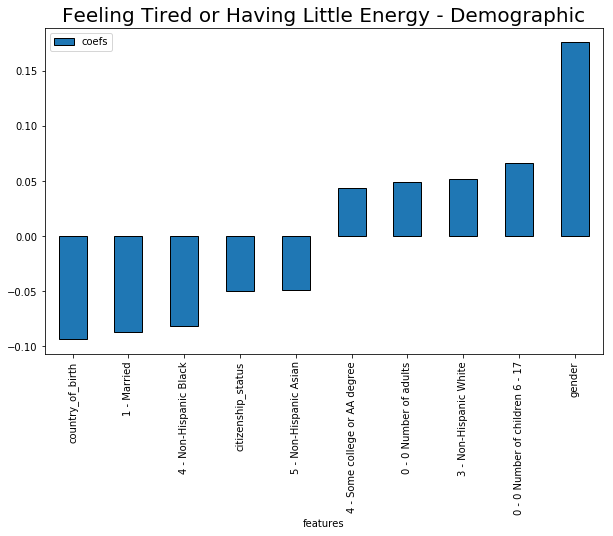

In [148]:
df_tired_1 = pd.DataFrame(tired_1, columns = ['features', 'coefs'])
df_tired_1.set_index('features', inplace = True)
fig, ax = plt.subplots(figsize = (10,6))
df_tired_1[(df_tired_1.coefs < -.048) | (df_tired_1.coefs > .043)].plot(kind = 'bar', ax = ax,
                                                                       edgecolor = ['black', 'black', 'black', 'black',
                                                                                    'black', 'black', 'black', 'black',
                                                                                    'black', 'black', ], linewidth = 1)

ax.set_title('Feeling Tired or Having Little Energy - Demographic', fontsize=20)

#### 'Poor appetite or overeating'
Baseline = 0.7386

In [45]:
gridSearcher(Xs, y_train_5)

LogisticRegression(C=0.24420530945486549, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
----
clf best parameter {'C': 0.24420530945486549}
----
clf best index 23
----
clf best best score 0.74062025591


#### Logistic Regression score on test data

In [46]:
logisticCoefs(.24420530945486549, Xs, y_train_5, Xs_test, y_test_5)

Test model score is 0.730994152047
----
Model Coefficents are:
[['1 - Married', -0.22802006172375575],
 ['5 - College graduate or above', -0.1432987859930894],
 ['5 - Never married', -0.11582104622328912],
 ['5 - Non-Hispanic Asian', -0.11434301650691242],
 ['4 - Non-Hispanic Black', -0.11333299480228597],
 ['2 - Widowed', -0.11010879586979629],
 ['country_of_birth', -0.09700463684208162],
 ['3 - Non-Hispanic White', -0.09574146203044938],
 ['6 - Living with partner', -0.08307214452286231],
 ['3 - Divorced', -0.05786519889690298],
 ['3 - High school graduate/GED or equivalent', -0.043874764094152266],
 ['age', -0.04144329883371645],
 ['veteran_status', -0.03304283925000813],
 ['4 - Some college or AA degree', -0.03204197052973734],
 ['1 - Less than 9th grade', -0.02189486523755371],
 ['1 - Mexican American', -0.019047989532230032],
 ['0 - 0 Number of children under 5', -0.01688031612711882],
 ['2 - 2 Number of children under 5', -0.008061041825097672],
 ['2 - Other Hispanic', -0.003972

#### 'Feeling bad about yourself'
Baseline = 0.8372

In [47]:
gridSearcher(Xs, y_train_6)

LogisticRegression(C=1e-10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
----
clf best parameter {'C': 1e-10}
----
clf best index 0
----
clf best best score 0.833875515073


#### Logistic Regression score on test data

In [48]:
logisticCoefs(.000000001, Xs, y_train_6, Xs_test, y_test_6)

Test model score is 0.873294346979
----
Model Coefficents are:
[['1 - Married', -1.8303588861742735e-07],
 ['5 - College graduate or above', -1.019039355381663e-07],
 ['age', -1.0164743463828947e-07],
 ['2 - 2 Number of adults', -9.939201447878623e-08],
 ['country_of_birth', -6.197511682573665e-08],
 ['4 - Non-Hispanic Black', -4.79005822125945e-08],
 ['2 - 2 Number of children under 5', -4.609774755785447e-08],
 ['5 - Non-Hispanic Asian', -3.355892055035668e-08],
 ['1 - Mexican American', -3.3533593205833645e-08],
 ['6 - Living with partner', -3.062036622287626e-08],
 ['3 - 3 Number of children 6 - 17', -1.8223109979045046e-08],
 ['citizenship_status', -1.6099858259483027e-08],
 ['1 - Less than 9th grade', -1.1178519681076585e-08],
 ['2 - Widowed', -3.3078865689014488e-09],
 ['1 - 1 Number of adults', -2.2672622574457865e-10],
 ['1 - 1 Number of children 6 - 17', 6.513544755516976e-10],
 ['2 - 2 Number of children 6 - 17', 3.000514769160638e-09],
 ['1 - 1 Number of children under 5', 

#### 'Trouble concentrating on things'
Baseline = 0.8377

In [49]:
gridSearcher(Xs, y_train_7)

LogisticRegression(C=1e-10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
----
clf best parameter {'C': 1e-10}
----
clf best index 0
----
clf best best score 0.838646714379


#### Logistic Regression score on test data

In [50]:
logisticCoefs(.000000001, Xs, y_train_7, Xs_test, y_test_7)

Test model score is 0.83820662768
----
Model Coefficents are:
[['1 - Married', -1.2177538292355771e-07],
 ['2 - 2 Number of adults', -8.400566201435333e-08],
 ['5 - College graduate or above', -7.317018378052059e-08],
 ['5 - Non-Hispanic Asian', -6.142366189284375e-08],
 ['citizenship_status', -6.074460572091009e-08],
 ['country_of_birth', -5.981963245756143e-08],
 ['3 - High school graduate/GED or equivalent', -4.0175127333791006e-08],
 ['4 - Non-Hispanic Black', -3.1554508181929756e-08],
 ['age', -2.8805001023834845e-08],
 ['2 - 2 Number of children 6 - 17', -2.4006865988188782e-08],
 ['2 - 2 Number of children under 5', -2.343929563115553e-08],
 ['1 - 1 Number of children 6 - 17', -1.9434914571774342e-08],
 ['1 - 1 Number of children under 5', -2.4709015443740468e-09],
 ['1 - Mexican American', 2.8026983485698483e-09],
 ['6 - Living with partner', 3.887675122318309e-09],
 ['4 - Some college or AA degree', 5.7379761416474715e-09],
 ['2 - Widowed', 6.6002311959688565e-09],
 ['0 - 0 Nu

#### 'Moving or speaking slowly or too fast'
Baseline = 0.8941

In [51]:
gridSearcher(Xs, y_train_8)

LogisticRegression(C=1e-10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
----
clf best parameter {'C': 1e-10}
----
clf best index 0
----
clf best best score 0.893081761006


#### Logistic Regression score on test data

In [52]:
logisticCoefs(.000000001, Xs, y_train_8, Xs_test, y_test_8)

Test model score is 0.916179337232
----
Model Coefficents are:
[['5 - College graduate or above', -1.0423184530269176e-07],
 ['5 - Non-Hispanic Asian', -8.724451700801855e-08],
 ['1 - Married', -8.562574429139511e-08],
 ['0 - 0 Number of adults', -4.599284042117298e-08],
 ['1 - 1 Number of children under 5', -3.454193662088115e-08],
 ['4 - Some college or AA degree', -2.99483837155808e-08],
 ['1 - 1 Number of children 6 - 17', -2.246615052034165e-08],
 ['4 - Non-Hispanic Black', -2.028602374929818e-08],
 ['6 - Living with partner', -1.4726177376815856e-08],
 ['2 - 2 Number of children 6 - 17', -1.3881759482213027e-08],
 ['2 - 2 Number of adults', -1.3353656458641669e-08],
 ['country_of_birth', -1.0638698195492314e-08],
 ['3 - Non-Hispanic White', -5.627424433432051e-09],
 ['citizenship_status', -4.782019668543662e-09],
 ['3 - 3 Number of children 6 - 17', -3.4380927991941393e-09],
 ['veteran_status', -1.822061090653948e-09],
 ['3 - High school graduate/GED or equivalent', 9.08217049809

#### 'Thought you would be better off dead'
Baseline = 0.9625

In [53]:
gridSearcher(Xs, y_train_9)

LogisticRegression(C=1e-10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
----
clf best parameter {'C': 1e-10}
----
clf best index 0
----
clf best best score 0.962047278248


#### Logistic Regression score on test data

In [54]:
logisticCoefs(.000000001, Xs, y_train_9, Xs_test, y_test_9)

Test model score is 0.966861598441
----
Model Coefficents are:
[['5 - College graduate or above', -4.618541439108065e-08],
 ['1 - Married', -4.484168131343098e-08],
 ['veteran_status', -3.2152906516580685e-08],
 ['2 - 2 Number of children 6 - 17', -2.4255478590040585e-08],
 ['country_of_birth', -2.3000389122415328e-08],
 ['4 - Non-Hispanic Black', -2.289413643682695e-08],
 ['3 - 3 Number of children 6 - 17', -2.0350451623975958e-08],
 ['5 - Non-Hispanic Asian', -1.8798848128243127e-08],
 ['1 - 1 Number of children under 5', -1.6711531106084518e-08],
 ['0 - 0 Number of adults', -1.58728167165693e-08],
 ['1 - 1 Number of children 6 - 17', -1.4901863468793233e-08],
 ['citizenship_status', -6.280228880495341e-09],
 ['6 - Living with partner', -4.9144259059709845e-09],
 ['gender', -4.910349907104749e-09],
 ['4 - Some college or AA degree', -2.3429120964963106e-09],
 ['1 - Mexican American', 1.2994585548633111e-09],
 ['0 - 0 Number of children under 5', 6.274425057734574e-09],
 ['1 - 1 Numbe

## All individuals in the demographics models are above 18

In [55]:
X_train[X_train.age < 18]

,gender,age,veteran_status,country_of_birth,citizenship_status,1 - Mexican American,2 - Other Hispanic,3 - Non-Hispanic White,4 - Non-Hispanic Black,5 - Non-Hispanic Asian,...,0 - 0 Number of children under 5,1 - 1 Number of children under 5,2 - 2 Number of children under 5,0 - 0 Number of children 6 - 17,1 - 1 Number of children 6 - 17,2 - 2 Number of children 6 - 17,3 - 3 Number of children 6 - 17,0 - 0 Number of adults,1 - 1 Number of adults,2 - 2 Number of adults


# Health Models
----

#### Splitting Dataset into X's and y's

In [56]:
X = data_health.iloc[:, 1:20]
y = data_health.iloc[:,20:]

#### Train Test Split

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [58]:
y_train_1 = y_train['Have little interest in doing things'].apply(lambda x: 1 if x > 0 else x).values # Baseline = 0.7387
y_train_2 = y_train['Feeling down, depressed, or hopeless'].apply(lambda x: 1 if x > 0 else x).values # Baseline = 0.7595
y_train_3 = y_train['Trouble sleeping or sleeping too much'].apply(lambda x: 1 if x > 0 else x).values # Baseline = 0.6185
y_train_4 = y_train['Feeling tired or having little energy'].apply(lambda x: 1 if x > 0 else x).values # Baseline = 0.4774
y_train_5 = y_train['Poor appetite or overeating'].apply(lambda x: 1 if x > 0 else x).values # Baseline = 0.7386
y_train_6 = y_train['Feeling bad about yourself'].apply(lambda x: 1 if x > 0 else x).values # Baseline = 0.8372
y_train_7 = y_train['Trouble concentrating on things'].apply(lambda x: 1 if x > 0 else x).values # Baseline = 0.8377
y_train_8 = y_train['Moving or speaking slowly or too fast'].apply(lambda x: 1 if x > 0 else x).values # Baseline = 0.8941
y_train_9 = y_train['Thought you would be better off dead'].apply(lambda x: 1 if x > 0 else x).values # Baseline = 0.9625

y_test_1 = y_test['Have little interest in doing things'].apply(lambda x: 1 if x > 0 else x).values
y_test_2 = y_test['Feeling down, depressed, or hopeless'].apply(lambda x: 1 if x > 0 else x).values
y_test_3 = y_test['Trouble sleeping or sleeping too much'].apply(lambda x: 1 if x > 0 else x).values
y_test_4 = y_test['Feeling tired or having little energy'].apply(lambda x: 1 if x > 0 else x).values
y_test_5 = y_test['Poor appetite or overeating'].apply(lambda x: 1 if x > 0 else x).values
y_test_6 = y_test['Feeling bad about yourself'].apply(lambda x: 1 if x > 0 else x).values
y_test_7 = y_test['Trouble concentrating on things'].apply(lambda x: 1 if x > 0 else x).values
y_test_8 = y_test['Moving or speaking slowly or too fast'].apply(lambda x: 1 if x > 0 else x).values
y_test_9 = y_test['Thought you would be better off dead'].apply(lambda x: 1 if x > 0 else x).values

In [59]:
ss = StandardScaler()
Xs = ss.fit_transform(X_train)
Xs_test = ss.transform(X_test)

#### 'Have little interest in doing things'
Baseline = 0.7387

In [60]:
gridSearcher(Xs, y_train_1)

LogisticRegression(C=0.0022229964825261957, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
----
clf best parameter {'C': 0.0022229964825261957}
----
clf best index 18
----
clf best best score 0.740883410375


#### Logistic Regression score on test data

In [61]:
logisticCoefs(0.0022229964825261957, Xs, y_train_1, Xs_test, y_test_1)

Test model score is 0.729792147806
----
Model Coefficents are:
[['standing_height', -0.05632444301850662],
 ['systolic', -0.048859230873838984],
 ['sodium(mmol/L)', -0.029573455735358974],
 ['arm_circumference', -0.016332266880573966],
 ['iron(ug/dL)', -0.014184659862324615],
 ['hepatitis_A', -0.009756414359092233],
 ['triglycerides(mg/dL)', -0.008795782034889985],
 ['calcium(mg/dL)', -0.004393510219115645],
 ['Albumin(ug/mL)', -0.0022712575880006807],
 ['weight_kg', 0.0026628257029668464],
 ['diastolic', 0.007731153578543459],
 ['total_cholesterol(mg/dL)', 0.009778056383080538],
 ['total_protein(g/dL)', 0.014553292743622614],
 ['phosphorus(mg/dL)', 0.02444230607930049],
 ['60_sec_pulse', 0.02639398913251037],
 ['potassium(mmol/L)', 0.028375998863420085],
 ['creatinine(mg/dL)', 0.04573111165327569],
 ['waist_circumference', 0.059416177775156974],
 ['glycohemoglobin', 0.06413706542033802]]


#### 'Feeling down, depressed, or hopeless'
Baseline = 0.7595

In [62]:
gridSearcher(Xs, y_train_2)

LogisticRegression(C=1e-10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
----
clf best parameter {'C': 1e-10}
----
clf best index 0
----
clf best best score 0.762455059065


#### Logistic Regression score on test data

In [63]:
logisticCoefs(0.000000001, Xs, y_train_2, Xs_test, y_test_2)

Test model score is 0.757505773672
----
Model Coefficents are:
[['standing_height', -7.56405147978629e-08],
 ['iron(ug/dL)', -2.826741481355756e-08],
 ['systolic', -2.1554514005562062e-08],
 ['Albumin(ug/mL)', -2.0857473061809577e-08],
 ['sodium(mmol/L)', -1.2964883301978808e-08],
 ['weight_kg', 5.995130964388533e-09],
 ['triglycerides(mg/dL)', 7.005914380315706e-09],
 ['diastolic', 7.857489410824333e-09],
 ['hepatitis_A', 8.27073863971246e-09],
 ['arm_circumference', 8.322389814526756e-09],
 ['calcium(mg/dL)', 1.0542819542738886e-08],
 ['total_protein(g/dL)', 1.3632801034023123e-08],
 ['potassium(mmol/L)', 1.4224606826440185e-08],
 ['total_cholesterol(mg/dL)', 3.467918934943479e-08],
 ['creatinine(mg/dL)', 3.716373597198248e-08],
 ['phosphorus(mg/dL)', 3.842822002688446e-08],
 ['glycohemoglobin', 4.080729097384735e-08],
 ['waist_circumference', 5.5968337081448055e-08],
 ['60_sec_pulse', 6.979530117170332e-08]]


#### 'Trouble sleeping or sleeping too much'
Baseline = 0.6185

In [64]:
gridSearcher(Xs, y_train_3)

LogisticRegression(C=0.000868511373751352, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
----
clf best parameter {'C': 0.000868511373751352}
----
clf best index 17
----
clf best best score 0.61915767848


#### Logistic Regression score on test data

In [65]:
logisticCoefs(0.000868511373751352, Xs, y_train_3, Xs_test, y_test_3)

Test model score is 0.621247113164
----
Model Coefficents are:
[['standing_height', -0.051353501050494764],
 ['hepatitis_A', -0.029140275191189575],
 ['sodium(mmol/L)', -0.028869597538328108],
 ['iron(ug/dL)', -0.022877815243887968],
 ['systolic', -0.018917969233499005],
 ['total_protein(g/dL)', -0.0161185679883294],
 ['potassium(mmol/L)', -0.010612461614479632],
 ['diastolic', -0.008451347192498702],
 ['triglycerides(mg/dL)', -0.007423564606771783],
 ['creatinine(mg/dL)', -0.003857007749761857],
 ['calcium(mg/dL)', -0.000257203895749923],
 ['total_cholesterol(mg/dL)', 0.0029981479089821435],
 ['phosphorus(mg/dL)', 0.005798883768444543],
 ['Albumin(ug/mL)', 0.009569659610560251],
 ['glycohemoglobin', 0.013668152052197631],
 ['arm_circumference', 0.013729737629903252],
 ['weight_kg', 0.014976948649127575],
 ['waist_circumference', 0.037048526951699065],
 ['60_sec_pulse', 0.037132937861842574]]


### Feeling tired or having little energy Column
Baseline = 0.5222

In [66]:
gridSearcher(Xs, y_train_4)

LogisticRegression(C=0.000868511373751352, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
----
clf best parameter {'C': 0.000868511373751352}
----
clf best index 17
----
clf best best score 0.549820236261


#### Logistic Regression score on test data

In [67]:
logisticCoefs(.000868511373751352, Xs, y_train_4, Xs_test, y_test_4)

Test model score is 0.577367205543
----
Model Coefficents are:
[['hepatitis_A', -0.05538521931047054],
 ['sodium(mmol/L)', -0.043605178241356755],
 ['standing_height', -0.03906187836318091],
 ['systolic', -0.03826091571380509],
 ['iron(ug/dL)', -0.030440830337110373],
 ['total_protein(g/dL)', -0.023826323323321425],
 ['total_cholesterol(mg/dL)', -0.020782780258105524],
 ['triglycerides(mg/dL)', -0.020491336163767138],
 ['diastolic', -0.013690173251341406],
 ['calcium(mg/dL)', -0.012048422032041161],
 ['creatinine(mg/dL)', -0.010300690959826837],
 ['Albumin(ug/mL)', -0.008973888751863146],
 ['potassium(mmol/L)', 0.009805763412204828],
 ['arm_circumference', 0.014511551478688281],
 ['phosphorus(mg/dL)', 0.015094508741516206],
 ['glycohemoglobin', 0.021065334889942878],
 ['60_sec_pulse', 0.02163908012646937],
 ['weight_kg', 0.03460028995511168],
 ['waist_circumference', 0.047071747241984804]]


In [68]:
lr = LogisticRegression(C = 0.000868511373751352)
lr_model = lr.fit(Xs, y_train_4)

In [69]:
for x in lr_model.coef_.tolist():
    tired_2 = []
    for a, b in zip(X_train, x):
         tired_2.append([a, b])
tired_2.sort(key = lambda x: x[1])

In [70]:
tired_2

[['hepatitis_A', -0.05538521931047054],
 ['sodium(mmol/L)', -0.043605178241356755],
 ['standing_height', -0.03906187836318091],
 ['systolic', -0.03826091571380509],
 ['iron(ug/dL)', -0.030440830337110373],
 ['total_protein(g/dL)', -0.023826323323321425],
 ['total_cholesterol(mg/dL)', -0.020782780258105524],
 ['triglycerides(mg/dL)', -0.020491336163767138],
 ['diastolic', -0.013690173251341406],
 ['calcium(mg/dL)', -0.012048422032041161],
 ['creatinine(mg/dL)', -0.010300690959826837],
 ['Albumin(ug/mL)', -0.008973888751863146],
 ['potassium(mmol/L)', 0.009805763412204828],
 ['arm_circumference', 0.014511551478688281],
 ['phosphorus(mg/dL)', 0.015094508741516206],
 ['glycohemoglobin', 0.021065334889942878],
 ['60_sec_pulse', 0.02163908012646937],
 ['weight_kg', 0.03460028995511168],
 ['waist_circumference', 0.047071747241984804]]

In [71]:
df_tired_2 = pd.DataFrame(tired_2, columns = ['features', 'coefs'])
df_tired_2.set_index('features', inplace = True)


Text(0.5,1,u'Feeling Tired or Having Little Energy - Health Results')

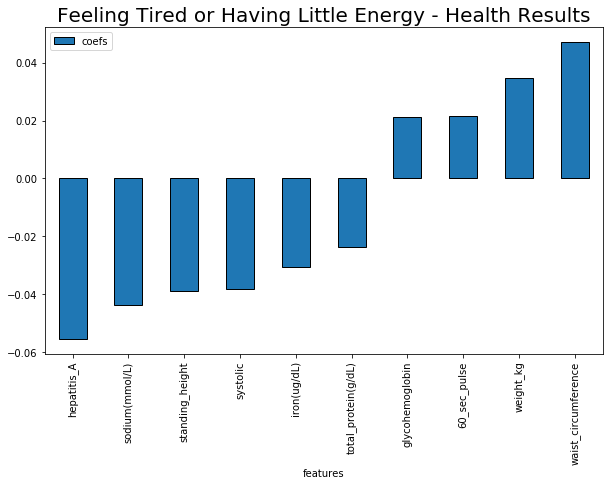

In [72]:
fig, ax = plt.subplots(figsize = (10,6))
df_tired_2[(df_tired_2.coefs < -.023) | (df_tired_2.coefs > .02)].plot(kind = 'bar', ax = ax, 
                                                                       edgecolor = ['black', 'black', 'black', 'black',
                                                                                    'black', 'black', 'black', 'black',
                                                                                    'black', 'black', ], linewidth = 1)

ax.set_title('Feeling Tired or Having Little Energy - Health Results', fontsize=20)

#### 'Poor appetite or overeating'
Baseline = 0.7386

In [73]:
gridSearcher(Xs, y_train_5)

LogisticRegression(C=0.037275937203149381, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
----
clf best parameter {'C': 0.037275937203149381}
----
clf best index 21
----
clf best best score 0.740626605033


#### Logistic Regression score on test data

In [74]:
logisticCoefs(.037275937203149381, Xs, y_train_5, Xs_test, y_test_5)

Test model score is 0.741339491917
----
Model Coefficents are:
[['standing_height', -0.21507095062310125],
 ['sodium(mmol/L)', -0.1346676426294769],
 ['iron(ug/dL)', -0.12409328301001951],
 ['systolic', -0.07034456688887668],
 ['calcium(mg/dL)', -0.059268343647618175],
 ['hepatitis_A', -0.02632497423434975],
 ['diastolic', -0.019780453122354918],
 ['arm_circumference', -0.01717709077396261],
 ['total_cholesterol(mg/dL)', -0.004749155390701739],
 ['glycohemoglobin', 0.0009754519599635637],
 ['60_sec_pulse', 0.0021379008159154353],
 ['potassium(mmol/L)', 0.0048134151734394275],
 ['triglycerides(mg/dL)', 0.03741870913647155],
 ['Albumin(ug/mL)', 0.04392740827917297],
 ['creatinine(mg/dL)', 0.051865204948947134],
 ['total_protein(g/dL)', 0.0651157906381966],
 ['phosphorus(mg/dL)', 0.0852569812186903],
 ['weight_kg', 0.1265829080578039],
 ['waist_circumference', 0.1773592816390909]]


#### 'Feeling bad about yourself'
Baseline = 0.8372

In [75]:
gridSearcher(Xs, y_train_6)

LogisticRegression(C=1e-10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
----
clf best parameter {'C': 1e-10}
----
clf best index 0
----
clf best best score 0.837955829481


#### Logistic Regression score on test data

In [76]:
logisticCoefs(.000000001, Xs, y_train_6, Xs_test, y_test_6)

Test model score is 0.836027713626
----
Model Coefficents are:
[['iron(ug/dL)', -3.4917787452069104e-08],
 ['hepatitis_A', -3.3678719391430905e-08],
 ['standing_height', -2.509056918141511e-08],
 ['systolic', -1.6878045471071903e-08],
 ['sodium(mmol/L)', -1.5626734033072914e-08],
 ['triglycerides(mg/dL)', -7.487818289962534e-09],
 ['glycohemoglobin', -5.630593966968283e-09],
 ['Albumin(ug/mL)', -3.946857742654958e-09],
 ['total_protein(g/dL)', 4.293364745815446e-09],
 ['calcium(mg/dL)', 7.826199485948083e-09],
 ['potassium(mmol/L)', 1.2571884949290783e-08],
 ['arm_circumference', 1.8548906867544048e-08],
 ['phosphorus(mg/dL)', 1.8972848622511597e-08],
 ['total_cholesterol(mg/dL)', 1.9745798920291343e-08],
 ['weight_kg', 2.5573295171307078e-08],
 ['waist_circumference', 2.928699071504283e-08],
 ['creatinine(mg/dL)', 5.690354429567273e-08],
 ['diastolic', 5.853388902427745e-08],
 ['60_sec_pulse', 6.558712204073409e-08]]


#### 'Trouble concentrating on things'
Baseline = 0.8377

In [77]:
gridSearcher(Xs, y_train_7)

LogisticRegression(C=1e-10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
----
clf best parameter {'C': 1e-10}
----
clf best index 0
----
clf best best score 0.832306111967


#### Logistic Regression score on test data

In [78]:
logisticCoefs(.000000001, Xs, y_train_7, Xs_test, y_test_7)

Test model score is 0.838337182448
----
Model Coefficents are:
[['iron(ug/dL)', -3.723467737121225e-08],
 ['standing_height', -3.195684978499195e-08],
 ['total_protein(g/dL)', -2.7307021615557306e-08],
 ['calcium(mg/dL)', -2.0547054576990187e-08],
 ['arm_circumference', -1.2757620260166577e-08],
 ['sodium(mmol/L)', -1.139253877566366e-08],
 ['Albumin(ug/mL)', -1.0215709130025154e-08],
 ['systolic', -8.3665728503169e-09],
 ['diastolic', -6.4603149613049376e-09],
 ['weight_kg', -5.14800985443783e-09],
 ['triglycerides(mg/dL)', -3.782285318561172e-09],
 ['60_sec_pulse', -1.7599605935179976e-09],
 ['total_cholesterol(mg/dL)', 5.763831502516911e-09],
 ['hepatitis_A', 1.1119914508852757e-08],
 ['phosphorus(mg/dL)', 1.184836496213065e-08],
 ['waist_circumference', 1.2570301774102938e-08],
 ['glycohemoglobin', 1.5723221401159607e-08],
 ['potassium(mmol/L)', 2.383353585167448e-08],
 ['creatinine(mg/dL)', 2.7034462202460665e-08]]


#### 'Moving or speaking slowly or too fast'
Baseline = 0.8941

In [79]:
gridSearcher(Xs, y_train_8)

LogisticRegression(C=1e-10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
----
clf best parameter {'C': 1e-10}
----
clf best index 0
----
clf best best score 0.896764252696


#### Logistic Regression score on test data

In [80]:
logisticCoefs(.000000001, Xs, y_train_8, Xs_test, y_test_8)

Test model score is 0.896073903002
----
Model Coefficents are:
[['standing_height', -6.585520599925932e-08],
 ['iron(ug/dL)', -2.2985010622181838e-08],
 ['weight_kg', -2.0759164513319635e-08],
 ['total_protein(g/dL)', -5.04979085820524e-09],
 ['triglycerides(mg/dL)', -4.3707158124340056e-09],
 ['calcium(mg/dL)', -3.5023746379958127e-09],
 ['phosphorus(mg/dL)', -3.2200091487648792e-09],
 ['arm_circumference', -1.748595596972279e-09],
 ['total_cholesterol(mg/dL)', -4.003241798976659e-10],
 ['systolic', -1.4052970092333436e-11],
 ['diastolic', 4.492347018196042e-09],
 ['Albumin(ug/mL)', 6.43598860794219e-09],
 ['sodium(mmol/L)', 8.898433585950598e-09],
 ['creatinine(mg/dL)', 9.347737166552424e-09],
 ['waist_circumference', 1.0381518090330305e-08],
 ['60_sec_pulse', 1.3040058355921304e-08],
 ['potassium(mmol/L)', 2.9112642569712444e-08],
 ['hepatitis_A', 3.2723849447375596e-08],
 ['glycohemoglobin', 4.065470000834662e-08]]


#### 'Thought you would be better off dead'
Baseline = 0.9625

In [81]:
gridSearcher(Xs, y_train_9)

LogisticRegression(C=1e-10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
----
clf best parameter {'C': 1e-10}
----
clf best index 0
----
clf best best score 0.9635336415


#### Logistic Regression score on test data

In [82]:
logisticCoefs(.000000001, Xs, y_train_9, Xs_test, y_test_9)

Test model score is 0.958429561201
----
Model Coefficents are:
[['iron(ug/dL)', -1.795563703223315e-08],
 ['standing_height', -4.0287389636501795e-09],
 ['diastolic', 1.509019142951696e-09],
 ['systolic', 2.874689270771118e-09],
 ['total_protein(g/dL)', 3.0242392148756923e-09],
 ['glycohemoglobin', 1.0303746603799683e-08],
 ['potassium(mmol/L)', 1.2396660505239107e-08],
 ['Albumin(ug/mL)', 1.2760411998921373e-08],
 ['total_cholesterol(mg/dL)', 1.2884842981779258e-08],
 ['phosphorus(mg/dL)', 1.4706153566352919e-08],
 ['calcium(mg/dL)', 1.4875943314328056e-08],
 ['hepatitis_A', 1.5785195550474786e-08],
 ['weight_kg', 1.6017295828981337e-08],
 ['arm_circumference', 1.632022556263016e-08],
 ['triglycerides(mg/dL)', 1.886599163837923e-08],
 ['60_sec_pulse', 2.1239456576709376e-08],
 ['creatinine(mg/dL)', 2.2472474426403784e-08],
 ['sodium(mmol/L)', 2.9708481218738193e-08],
 ['waist_circumference', 3.142618373184531e-08]]


# Annual Household Income

In [83]:
demographic_income = demographic[:]

### Dummying the Categorical Variables

##### Ethnicity

In [84]:
ethnicity_dummies_income = pd.get_dummies(demographic_income['ethnicity'])

ethnicity_dummies_income.columns = ['1 - Mexican American', '2 - Other Hispanic', '3 - Non-Hispanic White',
                     '4 - Non-Hispanic Black', '5 - Non-Hispanic Asian', '6 - Other Race - Including Multi-Racial']

ethnicity_dummies_income = ethnicity_dummies_income.drop('6 - Other Race - Including Multi-Racial', axis = 1)

demographic_income = pd.concat([demographic_income, ethnicity_dummies_income], axis = 1)
demographic_income = demographic_income.drop('ethnicity', axis = 1)

##### Education

In [85]:
education_dummies_income = pd.get_dummies(demographic_income['education'])

education_dummies_income.columns = ['1 - Less than 9th grade', '2 - 9-11th grade (Includes 12th grade with no diploma)',
                     '3 - High school graduate/GED or equivalent', '4 - Some college or AA degree',
                     '5 - College graduate or above']

education_dummies_income = education_dummies_income.drop('2 - 9-11th grade (Includes 12th grade with no diploma)', axis = 1)

demographic_income = pd.concat([demographic_income, education_dummies_income], axis = 1)
demographic_income = demographic_income.drop('education', axis = 1)

##### Maritial Status

In [86]:
marital_dummies_income = pd.get_dummies(demographic_income['marital_status'])

marital_dummies_income.columns = ['1 - Married', '2 - Widowed', '3 - Divorced', '4 - Separated',
                     '5 - Never married', '6 - Living with partner']

marital_dummies_income = marital_dummies_income.drop('4 - Separated', axis = 1)

demographic_income = pd.concat([demographic_income, marital_dummies_income], axis = 1)
demographic_income = demographic_income.drop('marital_status', axis = 1)

##### Household under 5

In [87]:
under5_dummies_income = pd.get_dummies(demographic_income['household_under5'])

under5_dummies_income.columns = ['0 - 0 Number of children under 5', '1 - 1 Number of children under 5',
                     '2 - 2 Number of children under 5', '3 - 3 or more Number of children under 5']

under5_dummies_income = under5_dummies_income.drop('3 - 3 or more Number of children under 5', axis = 1)

demographic_income = pd.concat([demographic_income, under5_dummies_income], axis = 1)
demographic_income = demographic_income.drop('household_under5', axis = 1)

##### Household 6 to 17

In [88]:
age6to17_dummies_income = pd.get_dummies(demographic_income['household_6to17'])

age6to17_dummies_income.columns = ['0 - 0 Number of children 6 - 17', '1 - 1 Number of children 6 - 17',
                            '2 - 2 Number of children 6 - 17', '3 - 3 Number of children 6 - 17',
                            '4 - 4 or more Number of children 6 - 17']

age6to17_dummies_income = age6to17_dummies_income.drop('4 - 4 or more Number of children 6 - 17', axis = 1)

demographic_income = pd.concat([demographic_income, age6to17_dummies_income], axis = 1)
demographic_income = demographic_income.drop('household_6to17', axis = 1)

##### Household over 60

In [89]:
over60_dummies_income = pd.get_dummies(demographic_income['household_over60'])

over60_dummies_income.columns = ['0 - 0 Number of adults over 60', '1 - 1 Number of adults over 60', 
                     '2 - 2 Number of adults over 60', '3 - 3 or more Number of adult over 60']

over60_dummies_income = over60_dummies_income.drop('3 - 3 or more Number of adult over 60', axis = 1)

demographic_income = pd.concat([demographic_income, over60_dummies_income], axis = 1)
demographic_income = demographic_income.drop('household_over60', axis = 1)

In [90]:
demographic_income.isnull().sum()

SEQN                                            0
gender                                          0
age                                             0
veteran_status                                  0
country_of_birth                                0
citizenship_status                             18
household_income                              991
1 - Mexican American                            0
2 - Other Hispanic                              0
3 - Non-Hispanic White                          0
4 - Non-Hispanic Black                          0
5 - Non-Hispanic Asian                          0
1 - Less than 9th grade                         0
3 - High school graduate/GED or equivalent      0
4 - Some college or AA degree                   0
5 - College graduate or above                   0
1 - Married                                     0
2 - Widowed                                     0
3 - Divorced                                    0
5 - Never married                               0


#### Dropping Nan's from income 

In [91]:
demographic_income = demographic_income.dropna()

## Demograhic Income Values

The encodes values for household_income are encoded below:
* 1 - Under 20,000
* 2	- 20,000 to 24,999
* 3	- 25,000 to 34,999	
* 4 - 35,000 to 44,999
* 5 - 45,000 to 54,999	
* 6 - 55,000 to 64,999	
* 7 - 65,000 to 74,999
* 8 - 75,000 to 99,999
* 9 - 100,000 and Over	

Just leaving all of these values as targets gave us a Logistic Regression Model accuracy of .3171, By consolidating our targets like we did above I believe we can get a better score.

The new encoded values are:
- 0 - Under 35,000
- 1 - 35,000 to 99,999 
- 2 - 100,000 and Over

In [92]:
demographic_income.household_income = demographic_income.household_income.apply(lambda x: 0 if x < 4
                                                                                else 1 if x in [4, 5, 6, 7, 8]
                                                                                else 2)

In [93]:
demographic_income[demographic_income.household_income == 0].shape

(3539, 31)

In [94]:
demographic_income[demographic_income.household_income == 1].shape

(3793, 31)

In [95]:
demographic_income[demographic_income.household_income == 2].shape

(1634, 31)

In [96]:
demographic_income.household_income.shape

(8966,)

#### Baseline is 0.4230

#### Splitting the Data into X's and y's

In [97]:
X = demographic_income.drop(['household_income', 'SEQN'], axis = 1)
y = demographic_income.household_income

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Standardized train and test X's

In [99]:
Xs = ss.fit_transform(X_train)
Xs_test = ss.transform(X_test)

In [100]:
gridSearcher(Xs, y_train)

LogisticRegression(C=0.037275937203149381, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
----
clf best parameter {'C': 0.037275937203149381}
----
clf best index 21
----
clf best best score 0.523703290574


In [101]:
logisticCoefs(0.037275937203149381, Xs, y_train, Xs_test, y_test)

Test model score is 0.538461538462
----
Model Coefficents are:
[['age', -0.3027835469762806],
 ['1 - Mexican American', -0.281341613492743],
 ['citizenship_status', -0.21164138666199603],
 ['4 - Non-Hispanic Black', -0.19043758616539502],
 ['2 - 2 Number of adults over 60', -0.1819266308451085],
 ['1 - 1 Number of adults over 60', -0.18148117150101445],
 ['0 - 0 Number of adults over 60', -0.11594289938602197],
 ['3 - 3 Number of children 6 - 17', -0.0965733111723996],
 ['3 - Divorced', -0.09302003069499826],
 ['country_of_birth', -0.0862473064828075],
 ['2 - Other Hispanic', -0.08555636779706909],
 ['2 - Widowed', -0.08437123008120324],
 ['veteran_status', -0.05099884473326407],
 ['2 - 2 Number of children under 5', -0.01929723012679826],
 ['0 - 0 Number of children 6 - 17', 0.023785127541493607],
 ['gender', 0.02454688370261551],
 ['3 - High school graduate/GED or equivalent', 0.04933679837424862],
 ['2 - 2 Number of children 6 - 17', 0.06194074191950005],
 ['6 - Living with partner'

In [102]:
clf = LogisticRegression(C = 0.037275937203149381).fit(Xs , y_train)

In [103]:
coefs = [x for x in clf.coef_.tolist()]

In [104]:
household_0 = coefs[0]
household_1 = coefs[1]
household_2 = coefs[2]

#### Under 35,000

In [105]:
ls_1 = []
for x, y in zip(X_train, household_0):
     ls_1.append([x, y])
ls_1.sort(key = lambda x: x[1])

In [106]:
ls_1

[['1 - Married', -0.5390260490069622],
 ['5 - College graduate or above', -0.4978638243962772],
 ['0 - 0 Number of children under 5', -0.3578817495670433],
 ['1 - 1 Number of children under 5', -0.25690507045896604],
 ['4 - Some college or AA degree', -0.2080586914981688],
 ['3 - Non-Hispanic White', -0.18065984866485332],
 ['5 - Non-Hispanic Asian', -0.17146902990228086],
 ['2 - 2 Number of children 6 - 17', -0.13755152973469212],
 ['2 - 2 Number of children under 5', -0.12739491243286197],
 ['6 - Living with partner', -0.09957975967138419],
 ['1 - 1 Number of children 6 - 17', -0.09413743070799745],
 ['3 - 3 Number of children 6 - 17', -0.05815743088511287],
 ['5 - Never married', -0.049486511445279165],
 ['3 - High school graduate/GED or equivalent', -0.023346351340020485],
 ['2 - Widowed', -0.006335220596388595],
 ['country_of_birth', -0.0056777277111985346],
 ['3 - Divorced', 0.003135135543757911],
 ['veteran_status', 0.022797164282237076],
 ['gender', 0.031495725334719116],
 ['2 

Text(0.5,1,u'Under $ 35,000 - Demographic')

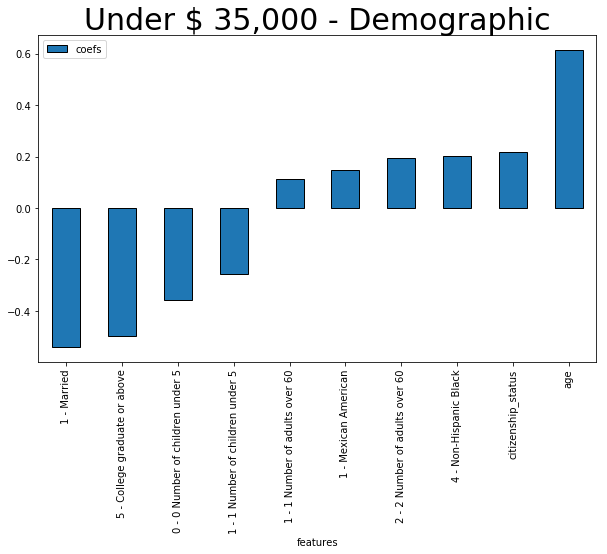

In [107]:
df_1 = pd.DataFrame(ls_1, columns = ['features', 'coefs'])
df_1.set_index('features', inplace = True)
fig, ax = plt.subplots(figsize = (10,6))
df_1[(df_1.coefs < -.21) | (df_1.coefs > .1111)].plot(kind = 'bar', ax = ax, 
                                                      edgecolor = ['black', 'black', 'black', 'black',
                                                                   'black', 'black', 'black', 'black',
                                                                   'black', 'black', ], linewidth = 1)

ax.set_title('Under $ 35,000 - Demographic', fontsize=30)

#### 35,000 to 99,999

In [108]:
ls_2 = []
for x, y in zip(X_train, household_1):
     ls_2.append([x, y])
ls_2.sort(key = lambda x: x[1])

In [109]:
ls_2

[['age', -0.39726969662221023],
 ['1 - Less than 9th grade', -0.1617511331484457],
 ['citizenship_status', -0.08129327167211077],
 ['4 - Non-Hispanic Black', -0.07936122669067326],
 ['0 - 0 Number of children 6 - 17', -0.059814101567216005],
 ['gender', -0.047329294055427996],
 ['2 - 2 Number of adults over 60', -0.02288023763312827],
 ['5 - Non-Hispanic Asian', -0.015710783901590985],
 ['0 - 0 Number of adults over 60', -0.013662900303306785],
 ['1 - 1 Number of children 6 - 17', -0.008367604037711878],
 ['1 - Mexican American', -0.0075312871561799225],
 ['veteran_status', 0.0012109138456244542],
 ['3 - High school graduate/GED or equivalent', 0.006734008688355969],
 ['2 - Other Hispanic', 0.00827776519229743],
 ['1 - 1 Number of adults over 60', 0.011505892069419077],
 ['3 - Non-Hispanic White', 0.017456768996041223],
 ['2 - Widowed', 0.02018518815726772],
 ['5 - Never married', 0.021494046558367154],
 ['country_of_birth', 0.029619300878132852],
 ['5 - College graduate or above', 0.0

#### Over 100,000

In [110]:
ls_3 = []
for x, y in zip(X_train, household_2):
     ls_3.append([x, y])
ls_3.sort(key = lambda x: x[1])

In [111]:
ls_3

[['age', -0.3027835469762806],
 ['1 - Mexican American', -0.281341613492743],
 ['citizenship_status', -0.21164138666199603],
 ['4 - Non-Hispanic Black', -0.19043758616539502],
 ['2 - 2 Number of adults over 60', -0.1819266308451085],
 ['1 - 1 Number of adults over 60', -0.18148117150101445],
 ['0 - 0 Number of adults over 60', -0.11594289938602197],
 ['3 - 3 Number of children 6 - 17', -0.0965733111723996],
 ['3 - Divorced', -0.09302003069499826],
 ['country_of_birth', -0.0862473064828075],
 ['2 - Other Hispanic', -0.08555636779706909],
 ['2 - Widowed', -0.08437123008120324],
 ['veteran_status', -0.05099884473326407],
 ['2 - 2 Number of children under 5', -0.01929723012679826],
 ['0 - 0 Number of children 6 - 17', 0.023785127541493607],
 ['gender', 0.02454688370261551],
 ['3 - High school graduate/GED or equivalent', 0.04933679837424862],
 ['2 - 2 Number of children 6 - 17', 0.06194074191950005],
 ['6 - Living with partner', 0.0845267212936138],
 ['1 - 1 Number of children under 5', 0.

Text(0.5,1,u'Over $ 100,000 - Demographic')

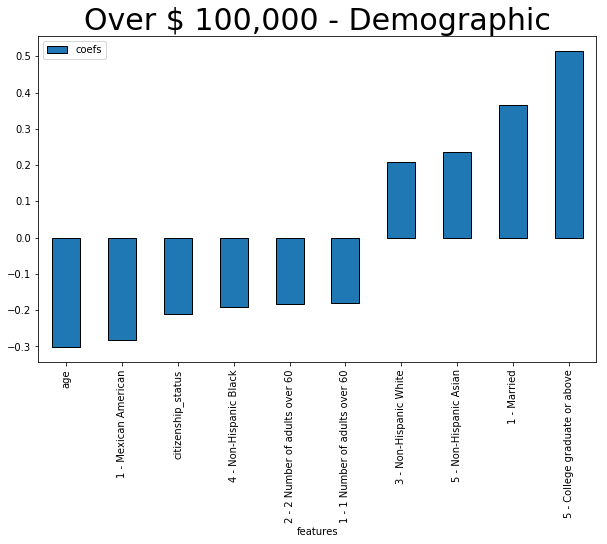

In [112]:
df_3 = pd.DataFrame(ls_3, columns = ['features', 'coefs'])
df_3.set_index('features', inplace = True)
fig, ax = plt.subplots(figsize = (10,6))
df_3[(df_3.coefs < -.18) | (df_3.coefs > .202)].plot(kind = 'bar', ax = ax, 
                                                      edgecolor = ['black', 'black', 'black', 'black',
                                                                   'black', 'black', 'black', 'black',
                                                                   'black', 'black', ], linewidth = 1)

ax.set_title('Over $ 100,000 - Demographic', fontsize=30)

## Health on Income

In [113]:
health_income = pd.merge(data_health, demographic_income, on = 'SEQN', how = 'inner')

In [114]:
health_income = health_income.dropna()

In [115]:
X = health_income.iloc[:, 1:20]
y = health_income.household_income

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [117]:
Xs = ss.fit_transform(X_train)
Xs_test = ss.transform(X_test)

In [118]:
gridSearcher(Xs, y_train)

LogisticRegression(C=0.24420530945486549, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
----
clf best parameter {'C': 0.24420530945486549}
----
clf best index 23
----
clf best best score 0.481617647059


In [119]:
clf = LogisticRegression(C = 0.24420530945486549).fit(Xs , y_train)

In [120]:
coefs = [x for x in clf.coef_.tolist()]
household_0 = coefs[0]
household_1 = coefs[1]
household_2 = coefs[2]

#### Under 35,000

In [121]:
ls_4 = []
for x, y in zip(X_train, household_0):
     ls_4.append([x, y])
ls_4.sort(key = lambda x: x[1])

In [122]:
ls_4

[['weight_kg', -0.6254810121783518],
 ['diastolic', -0.19432698562675532],
 ['total_cholesterol(mg/dL)', -0.11772105693620058],
 ['standing_height', -0.09370152113529992],
 ['iron(ug/dL)', -0.07075549896258207],
 ['phosphorus(mg/dL)', -0.047503405621093064],
 ['arm_circumference', -0.030117612598714136],
 ['triglycerides(mg/dL)', 0.0012890975505541501],
 ['sodium(mmol/L)', 0.0018442264926365945],
 ['calcium(mg/dL)', 0.024939902534391545],
 ['60_sec_pulse', 0.0635858250458582],
 ['glycohemoglobin', 0.06827877399609006],
 ['Albumin(ug/mL)', 0.08340633979691436],
 ['potassium(mmol/L)', 0.0891443951634133],
 ['total_protein(g/dL)', 0.14311306857480624],
 ['hepatitis_A', 0.17163354168020453],
 ['creatinine(mg/dL)', 0.17415533676553052],
 ['systolic', 0.25729235259282845],
 ['waist_circumference', 0.6305247493314947]]

Text(0.5,1,u'Under $ 35,000 - Health Results')

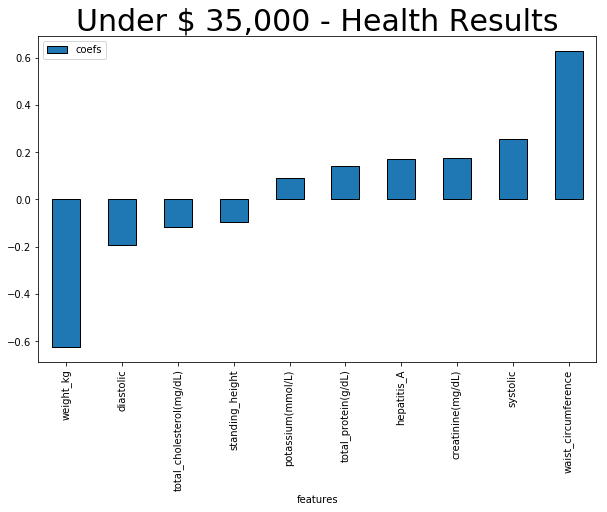

In [123]:
df_4 = pd.DataFrame(ls_4, columns = ['features', 'coefs'])
df_4.set_index('features', inplace = True)
fig, ax = plt.subplots(figsize = (10,6))
df_4[(df_4.coefs < -.085) | (df_4.coefs > .087)].plot(kind = 'bar', ax = ax,
                                                     edgecolor = ['black', 'black', 'black', 'black',
                                                                   'black', 'black', 'black', 'black',
                                                                   'black', 'black', ], linewidth = 1)
ax.set_title('Under $ 35,000 - Health Results', fontsize=30)

#### 35,000 to 99,999

In [124]:
ls_5 = []
for x, y in zip(X_train, household_1):
     ls_5.append([x, y])
ls_5.sort(key = lambda x: x[1])

In [125]:
ls_5

[['waist_circumference', -0.43657209250569073],
 ['systolic', -0.0842216840330788],
 ['creatinine(mg/dL)', -0.06458915785980283],
 ['hepatitis_A', -0.06403701956510312],
 ['potassium(mmol/L)', -0.056826795870112384],
 ['standing_height', -0.045860681991116266],
 ['Albumin(ug/mL)', -0.037926379278286085],
 ['sodium(mmol/L)', -0.024721173571806813],
 ['iron(ug/dL)', -0.00778007018793844],
 ['60_sec_pulse', -0.00619241476913432],
 ['glycohemoglobin', -0.0032237034172817656],
 ['total_protein(g/dL)', -0.0004121268738081377],
 ['triglycerides(mg/dL)', 0.009185684233817423],
 ['calcium(mg/dL)', 0.022638447268350178],
 ['total_cholesterol(mg/dL)', 0.038317305800301314],
 ['phosphorus(mg/dL)', 0.04658723563245813],
 ['diastolic', 0.06822152532064218],
 ['arm_circumference', 0.11784281892841765],
 ['weight_kg', 0.38238252238899256]]

#### Over 100,000

In [126]:
ls_6 = []
for x, y in zip(X_train, household_2):
     ls_6.append([x, y])
ls_6.sort(key = lambda x: x[1])

In [127]:
ls_6

[['systolic', -0.33068713358675644],
 ['Albumin(ug/mL)', -0.295557982601297],
 ['waist_circumference', -0.2634036215684782],
 ['total_protein(g/dL)', -0.24185559567517678],
 ['hepatitis_A', -0.15865274568315402],
 ['creatinine(mg/dL)', -0.15756155093600144],
 ['glycohemoglobin', -0.1549916388555416],
 ['arm_circumference', -0.15436444701353838],
 ['60_sec_pulse', -0.1019161718933691],
 ['calcium(mg/dL)', -0.07539753551748914],
 ['potassium(mmol/L)', -0.05698990512250117],
 ['triglycerides(mg/dL)', -0.024888756828949688],
 ['phosphorus(mg/dL)', -0.004299736471984023],
 ['sodium(mmol/L)', 0.03369852950217119],
 ['iron(ug/dL)', 0.11406986941688836],
 ['total_cholesterol(mg/dL)', 0.13224014161491732],
 ['standing_height', 0.23650842013571904],
 ['diastolic', 0.25606333740003223],
 ['weight_kg', 0.3475434615783843]]

Text(0.5,1,u'Over $ 100,000 - Health Results')

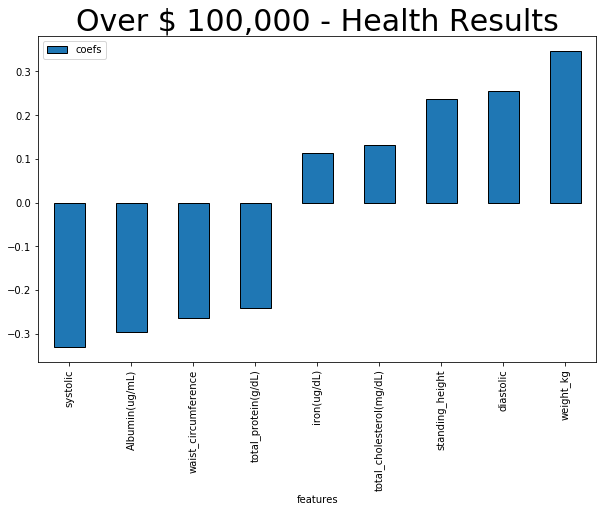

In [128]:
df_6 = pd.DataFrame(ls_6, columns = ['features', 'coefs'])
df_6.set_index('features', inplace = True)
fig, ax = plt.subplots(figsize = (10,6))
df_6[(df_6.coefs < -.24) | (df_6.coefs > .05)].plot(kind = 'bar', ax = ax,
                                                     edgecolor = ['black', 'black', 'black', 'black',
                                                                   'black', 'black', 'black', 'black',
                                                                   'black', 'black', ], linewidth = 1)

ax.set_title('Over $ 100,000 - Health Results', fontsize=30)

## Household income on Whole Dataset 

In [129]:
data_health = body_df.merge(blood_pressure_measurements, on = 'SEQN', how = 'inner')

data_health = data_health.merge(albumin_and_creatinine_measurements, on = 'SEQN', how = 'inner')

data_health = data_health.merge(cholesterol_measurements, on = 'SEQN', how = 'inner')

data_health = data_health.merge(glycohemoglobin_measurements, on = 'SEQN', how = 'inner')

data_health = data_health.merge(hepatitis_A_measurements, on = 'SEQN', how = 'inner')

data_health = data_health.merge(biochemistry_measurements, on = 'SEQN', how = 'inner')

In [130]:
all_df = demographic_income.merge(data_health, on = 'SEQN')

In [131]:
all_df = all_df.dropna()

In [132]:
all_df = all_df[all_df.age > 17]

In [133]:
X = all_df.drop(['SEQN', 'household_income'], axis = 1)
y = all_df.household_income

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [135]:
Xs = ss.fit_transform(X_train)
Xs_test = ss.transform(X_test)

In [136]:
gridSearcher(Xs, y_train)

LogisticRegression(C=0.095409547634999634, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
----
clf best parameter {'C': 0.095409547634999634}
----
clf best index 22
----
clf best best score 0.56367378441


In [137]:
clf = LogisticRegression(C = 0.095409547634999634).fit(Xs , y_train)

In [138]:
coefs = [x for x in clf.coef_.tolist()]
household_0 = coefs[0]
household_1 = coefs[1]
household_2 = coefs[2]

#### Under 35,000

In [139]:
ls_7 = []
for x, y in zip(X_train, household_0):
     ls_7.append([x, y])
ls_7.sort(key = lambda x: x[1])

In [140]:
ls_7

[['1 - Married', -0.6986103218593372],
 ['5 - College graduate or above', -0.641796964914074],
 ['0 - 0 Number of children under 5', -0.3151991572540617],
 ['4 - Some college or AA degree', -0.2881894880050967],
 ['weight_kg', -0.2646759185420538],
 ['5 - Non-Hispanic Asian', -0.22782630634416318],
 ['1 - 1 Number of children under 5', -0.17226616084745394],
 ['6 - Living with partner', -0.1551113877140262],
 ['diastolic', -0.127544150785953],
 ['2 - 2 Number of children 6 - 17', -0.10847926782219777],
 ['2 - 2 Number of children under 5', -0.10424468019121501],
 ['5 - Never married', -0.09290049465046007],
 ['3 - High school graduate/GED or equivalent', -0.09001681082881612],
 ['total_cholesterol(mg/dL)', -0.0803309260947154],
 ['iron(ug/dL)', -0.07865950244104856],
 ['arm_circumference', -0.07650357706233223],
 ['2 - Widowed', -0.06623045988377559],
 ['standing_height', -0.0608538283062184],
 ['1 - 1 Number of children 6 - 17', -0.06052786153119775],
 ['gender', -0.04085064373091567]

Text(0.5,1,u'Under 35,000 - All Features')

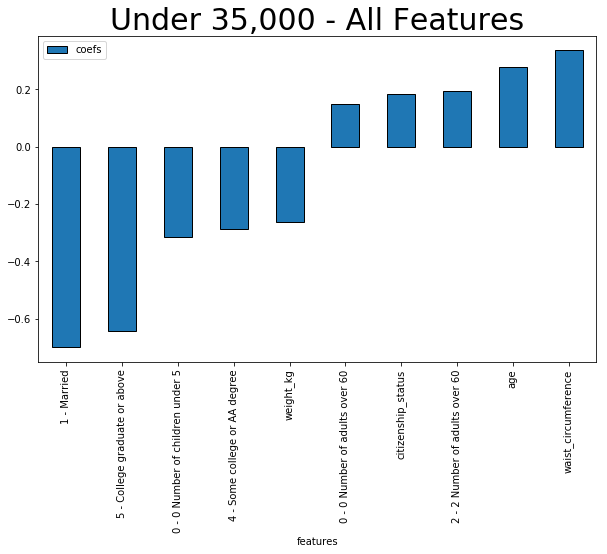

In [141]:
df_7 = pd.DataFrame(ls_7, columns = ['features', 'coefs'])
df_7.set_index('features', inplace = True)
fig, ax = plt.subplots(figsize = (10,6))
df_7[(df_7.coefs < -.23) | (df_7.coefs > .13)].plot(kind = 'bar', ax = ax,
                                                    edgecolor = ['black', 'black', 'black', 'black',
                                                                   'black', 'black', 'black', 'black',
                                                                   'black', 'black', ], linewidth = 1)

ax.set_title('Under 35,000 - All Features', fontsize=30)

#### 35,000 to 99,999

In [142]:
for x, y in zip(X_train, household_1):
    print x, y

gender -0.0157359488768
age -0.311337291281
veteran_status -0.0180960168318
country_of_birth -0.0439070641302
citizenship_status -0.0621675272444
1 - Mexican American 0.0604182662501
2 - Other Hispanic 0.0369185948597
3 - Non-Hispanic White -0.0820805517086
4 - Non-Hispanic Black -0.0243643952284
5 - Non-Hispanic Asian 0.0456496298234
1 - Less than 9th grade -0.135531074872
3 - High school graduate/GED or equivalent 0.0343870655595
4 - Some college or AA degree 0.159368233848
5 - College graduate or above 0.0398688779591
1 - Married 0.364876269086
2 - Widowed 0.0611365804643
3 - Divorced 0.0242898257099
5 - Never married 0.0290169757619
6 - Living with partner 0.0548747439444
0 - 0 Number of children under 5 0.180640134778
1 - 1 Number of children under 5 0.108507765195
2 - 2 Number of children under 5 0.0896215897375
0 - 0 Number of children 6 - 17 -0.13607573314
1 - 1 Number of children 6 - 17 -0.0787307203717
2 - 2 Number of children 6 - 17 0.00368124955891
3 - 3 Number of children 

#### Over 100,000

In [143]:
for x, y in zip(X_train, household_2):
    print x, y

gender 0.0328305097775
age 0.0861868732509
veteran_status -0.0518490025591
country_of_birth -0.0626099407383
citizenship_status -0.18929353041
1 - Mexican American -0.130432251586
2 - Other Hispanic -0.00185253368845
3 - Non-Hispanic White 0.174763865369
4 - Non-Hispanic Black -0.0840567380477
5 - Non-Hispanic Asian 0.211647775986
1 - Less than 9th grade -0.135546373281
3 - High school graduate/GED or equivalent 0.146776987106
4 - Some college or AA degree 0.267838524401
5 - College graduate or above 0.681972684503
1 - Married 0.464210690991
2 - Widowed -0.0681845895699
3 - Divorced -0.0889089351835
5 - Never married 0.181103923132
6 - Living with partner 0.188610039827
0 - 0 Number of children under 5 0.196354909909
1 - 1 Number of children under 5 0.0777563902902
2 - 2 Number of children under 5 -0.0042474780826
0 - 0 Number of children 6 - 17 0.082617905825
1 - 1 Number of children 6 - 17 0.250578572696
2 - 2 Number of children 6 - 17 0.129334010045
3 - 3 Number of children 6 - 17 -

In [144]:
ls_9 = []
for x, y in zip(X_train, household_2):
     ls_9.append([x, y])
ls_9.sort(key = lambda x: x[1])

In [145]:
ls_9

[['1 - 1 Number of adults over 60', -0.2552828020242769],
 ['systolic', -0.24647758603473321],
 ['citizenship_status', -0.1892935304099076],
 ['2 - 2 Number of adults over 60', -0.18124376178411397],
 ['waist_circumference', -0.17658900018119633],
 ['1 - Less than 9th grade', -0.1355463732811298],
 ['1 - Mexican American', -0.13043225158648813],
 ['total_protein(g/dL)', -0.1296045814185581],
 ['3 - 3 Number of children 6 - 17', -0.10733642205617554],
 ['Albumin(ug/mL)', -0.10316003792432252],
 ['glycohemoglobin', -0.0991406929470704],
 ['3 - Divorced', -0.08890893518349272],
 ['4 - Non-Hispanic Black', -0.08405673804766538],
 ['creatinine(mg/dL)', -0.08307012647219568],
 ['0 - 0 Number of adults over 60', -0.06931531954082482],
 ['2 - Widowed', -0.06818458956988252],
 ['arm_circumference', -0.06283474615325903],
 ['country_of_birth', -0.06260994073827901],
 ['60_sec_pulse', -0.05209613079249525],
 ['veteran_status', -0.051849002559074604],
 ['hepatitis_A', -0.03232503085348181],
 ['pho

Text(0.5,1,u'Over 100,000 - All Features')

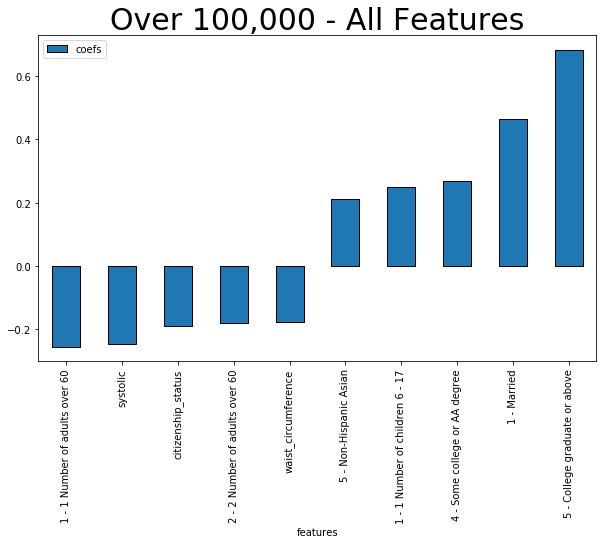

In [146]:
df_9 = pd.DataFrame(ls_9, columns = ['features', 'coefs'])
df_9.set_index('features', inplace = True)
fig, ax = plt.subplots(figsize = (10,6))
df_9[(df_9.coefs < -.15) | (df_9.coefs > .21)].plot(kind = 'bar', ax = ax,
                                                    edgecolor = ['black', 'black', 'black', 'black',
                                                                   'black', 'black', 'black', 'black',
                                                                   'black', 'black', ], linewidth = 1)

ax.set_title('Over 100,000 - All Features', fontsize=30)